<a href="https://colab.research.google.com/github/theuttammishra/Retail-Sales/blob/main/Retail_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Retail Sales Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Uttam Mishra
##### **Team Member 2 -** Kshitij Singh


# **Project Summary -**

The project is on Rossmann a company which operates thousands of drug stores in a few countries. Since they are a multinational company they try to predict their daily sales in advance. We were given two datasets namely - 'Rossmann stores data.csv' and 'store.csv' data. both of these datasets contained multiple rows and columns.

these datasets contained the data about various factor that have influenced the sales of the organisation over the past few years. with this historical data we were given a task to predict the sales for upcoming weeks, keeping in mind the fact that many of the stores were closed for refurbishment.

We started with checking the info of the dataset about the variables that are present in both the dataset and found that store column was same in both the datasets which could be used to merge the dataset for ease of work after merging the dataset we did the data wrangling by cleaning the data set of null and missing values and changing the incorrect data types which were present in it and also corrected the format of date and time to make It analysis ready.

After data wrangling we did exploratory data analysis on the dataset to find out how the various factors influence the sales of the company. We used multiple kind of charts including but not limited to bar graph, pie plot, count plot etc. EDA helped us understand which factors influence the sales.

We also did a correlation check between the  variables using correlation heatmap and pairplot.

After eda we did hypothesis testing to check whether certain hypothesis are true or not which we encountered during the exploratory data analysis. In total we checked three statements.
then we moved towards algorithm testing for which we had to again do some transformation on the dataset as well as introduction of new features in this process we did outlier detection, data transformation, categorical encoding, feature engineering, data splitting and data scaling. These procedures helped make data ready for model implementation.

For machine learning model implementation we chose to check with three models, first we started with the most basic model linear regression, we did the train test split with the model and predicted the output with it and then did a metrics evaluation and found the values for MSE, MAE, RMSE, RMSPE, R2, Adjusted r2 . after obtaining these results we did a visualisation for the model evaluation which showed the comparison between actual and predicted values using lineplot.
After this we also did testing using Lasso and Ridge regression as well as we did a cross validation and hyperparameter tuning using GridSearchCV. 

Then we moved to the second algorithm which was DecisionTree Regression we again did all the similar operations as we did on Linear Regression and plotted a lineplot for performance evaluation.

The third algorithm we used was RandomForest Regression. Similar to previous two models we did the same procedure with Random Forest Regressor as well.

After the analysis we found that the RandomForest Regression model was the best performing model among the three.


# **GitHub Link -**

https://github.com/theuttammishra/Retail-Sales.git

# **Problem Statement**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# ***Let's Begin !***

## ***1. Know Your Data***

### Importing Libraries

In [1]:
# importing libraries
import pandas as pd

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})

from datetime import datetime

import warnings    
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


### Dataset Loading

In [2]:
# Mounting Google Drive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the Rossmann and store datasets
df1 = pd.read_csv('/content/drive/My Drive/Retail Sales Prediction/Rossmann Stores Data.csv')
df2 = pd.read_csv('/content/drive/My Drive/Retail Sales Prediction/store.csv')

### Dataset First View

In [4]:
# Rossmann Dataset First Look
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
# Store Dataset First Look
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [6]:
# Rossmann Dataset Rows & Columns count
Rows , Columns = df1.shape
print('Number of Rows', Rows )
print('Number of Columns', Columns )

Number of Rows 1017209
Number of Columns 9


In [7]:
# Store Dataset Rows & Columns count
Rows , Columns = df2.shape
print('Number of Rows', Rows )
print('Number of Columns', Columns )

Number of Rows 1115
Number of Columns 10


### Dataset Information

In [8]:
# Rossmann Dataset Info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [9]:
# Store Dataset Info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


###Going through both the datasets we see that store column is common in both. So we can merge them together for ease of work.



In [10]:
# Merging Rossmann and store dataset
df = df1.merge(df2)
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [11]:
# looking the number of rows and columns of dataset
Rows , Columns = df.shape
print('Number of Rows', Rows )
print('Number of Columns', Columns )

Number of Rows 1017209
Number of Columns 18


In [12]:
# Taking a look through the merged dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [13]:
# Looking the description of the dataset
df.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1017209,1017209,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000,509178
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN,551627,537445,NaN,NaN,NaN,NaN,NaN,NaN,293122
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01,NaN,NaN,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774,NaN
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01,NaN,NaN,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870,NaN
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000,NaN
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000,NaN
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000,NaN
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00,NaN,NaN,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000,NaN


#### Duplicate Values

In [14]:
#Checking Dataset Duplicate Value 
df.duplicated().sum()

0

#### Missing Values/Null Values

In [15]:
# Missing Values/Null Values Count
print(df.isnull().sum())

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64


In the above result we see that there are some columns in the dataset that contain null values.

### What did you know about your dataset?

Our dataset has in total 1017209 rows and 18 columns.

Dataset does not have any duplicate values.

in our dataset some coulumns have null values, to get correct results we will have to perform EDA and data wrangling in our dataset

## ***2. Understanding Your Variables***

Checking the number of columns in the dataset and there names

In [16]:
# Dataset Columns
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [17]:
# Dataset Description
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


### Variables Description 

1. Id - Unique entry id:

2. Store - a unique Id for store.

3. Sales - Sales made for a day.

4. Customers - the number of customers that visited in a particular day.
.
5. Open - to show whether store was open: 0 = closed, 1 = open.

6. StateHoliday - indicates a state holiday.

7. SchoolHoliday - indicates a school holiday.

8. StoreType - Type of the store.
9. Assortment - describes an assortment level: a = basic, b = extra, c = extended

10. CompetitionDistance - distance from the nearest competitor store.

11. CompetitionOpenSince [Month/Year] - year and month of the time the nearest competitor was opened

12. Promo - store running a promo or not

13. Promo2 - store running consecutive promo or not

14. Promo2Since[Year/Week] - the year and week when the store started participating in Promo2

15. PromoInterval - describes the consecutive intervals Promo2 is started,

### Check Unique Values for each variable.

In [18]:
# Check Unique Values for each variable.
count=df[['Store','DayOfWeek','Date','Sales','Customers','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']].nunique()
print("Unique value count for each column:\n",count)
     

Unique value count for each column:
 Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     5
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            654
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 24
Promo2SinceYear                  7
PromoInterval                    3
dtype: int64


## 3. ***Data Wrangling***

As we saw in the dataset that columns ***'CompetitionDistance' , 'CompetitionOpenSinceMonth' , 'CompetitionOpenSinceYear' , 'Promo2SinceWeek' , 'Promo2SinceYear' , 'PromoInterval'*** contained null values.

Now in order to get correct outcomes from the data we will have to perform data wrangling and replace these null values accordingly.

### Data Wrangling Code

In [19]:
#in the case of 'CompetitionDistance' we fill Nan Values With Median. 
df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(),inplace=True)

In [20]:
#Checking that Nan Value is Replaced or Not
df['CompetitionDistance'].isnull().value_counts()

False    1017209
Name: CompetitionDistance, dtype: int64

In [21]:
# in the 'CompetitionOpenSinceMonth' column we fill the Nan values with mode 
df['CompetitionOpenSinceMonth'].fillna(df2['CompetitionOpenSinceMonth'].mode()[0],inplace=True)

In [22]:
# in the 'CompetitionOpenSinceYear' column we fill the Nan values with mode 
df['CompetitionOpenSinceYear'].fillna(df2['CompetitionOpenSinceYear'].mode()[0],inplace=True)

In [23]:
#in columns 'Promo2SinceWeek' and 'Promo2SinceYear' Filling Nan Values With 0
df[['Promo2SinceWeek','Promo2SinceYear']]=df2[['Promo2SinceWeek','Promo2SinceYear']].replace(np.nan,0)

In [24]:
#As PromoInterval is Object Type so Replacing its Null value with 0
df['PromoInterval']=df2['PromoInterval'].replace(np.nan,"0")


Correcting date and time format

In [25]:
# changing format of date from object to datetime
df['Date'] = pd.to_datetime(df['Date'], format= '%Y-%m-%d')

In [26]:
# Printing the start date and end date in the dataset.
print(df['Date'].min(),'Starting Date')
print(df['Date'].max(),'Ending Date')

2013-01-01 00:00:00 Starting Date
2015-07-31 00:00:00 Ending Date


In [27]:
#creating features from the date month and year
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.weekofyear
df['DayOfYear'] = df['Date'].dt.dayofyear
years = df['Year'].unique()

Sorting the values from store column

In [28]:
# Sorting the values in ascending order of storetype.
df.sort_values(by=['StoreType'],inplace=True,ascending = True)

In [29]:
# getting the types of unique stores.
df.StoreType.unique()

array(['a', 'b', 'c', 'd'], dtype=object)

Sorting values from assortment column

In [30]:
#sorting Assortment values
df.sort_values(by=['Assortment'],inplace=True,ascending=True)

In [31]:
# Printing the unique assortment values.
df.Assortment.unique()

array(['a', 'b', 'c'], dtype=object)

In [32]:
# Checking unique values in stateholiday column
df.StateHoliday.unique()

array(['0', 'b', 0, 'a', 'c'], dtype=object)

As seen in the above result that the values contain a, b , c we replace them with either 0 or 1 where:

0- Not a State holiday

1- State holiday

In [33]:
df["StateHoliday"].replace({"a": 1, "b": 1,"c":1}, inplace=True)
#replacing
df['StateHoliday']=df['StateHoliday'].replace(['0'],0)

### What all manipulations have you done and insights you found?

We did data wrangling in following columns/values in the dataset.
1. Filled the Null values in different columns with there relevant mean/median/mode values and in some cases with 0.
2. We made corrections in date and time format and made it proper so that we can get appropriate date and time values.
3. Then we sorted the values in the store column and found unique store types.
4. We repeated the same for the Assortment column.
5. We also replaced some of the wrong datatype values from the State Holiday column to make it analysis ready.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Checking different store types and number of stores.

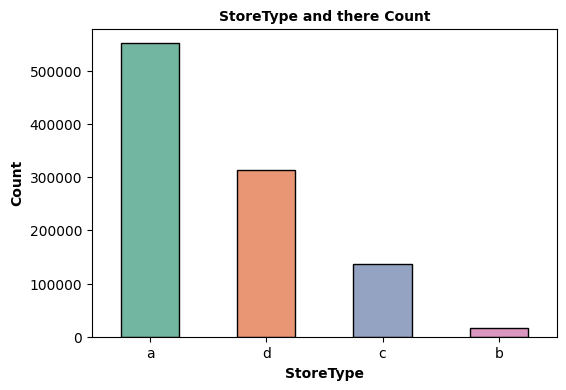

In [34]:
# Plotting the store types using a bar plot
plt.figure(figsize=(6,4))
ax=sns.countplot(x=df['StoreType'],palette='Set2',edgecolor='black',width = 0.5)
ax.set_xlabel('StoreType',size=10,fontdict={"weight": "bold"})
ax.set_ylabel('Count',size=10,fontdict={"weight": "bold"})
ax.set_title("StoreType and there Count",fontsize=10,fontdict={"weight": "bold"})
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart helps to compare the different sets of data among different groups easily.

###### 2. What is/are the insight(s) found from the chart?

We can see the count of Store Type for all 4 different store types in descending order

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights will help to get a clear picture of store types and there count and it shows where the focus needs to be directed.

#### Chart - 2 Plotting the Assortment types

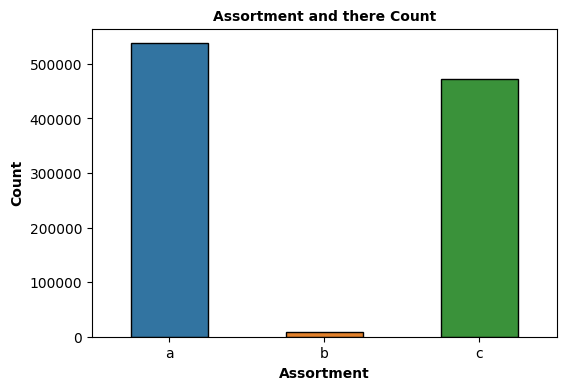

In [35]:
# Plotting the Assortment
plt.figure(figsize=(6,4))
ax=sns.countplot(x = df['Assortment'],edgecolor='black', width = 0.5)
ax.set_xlabel('Assortment',size=10,fontdict={"weight": "bold"})
ax.set_ylabel('Count',size=10,fontdict={"weight": "bold"})
ax.set_title("Assortment and there Count",fontsize=10,fontdict={"weight": "bold"})
plt.show()

##### 1. Why did you pick the specific chart?

Count plot makes it easy to get the number of all unique variables and there count.

##### 2. What is/are the insight(s) found from the chart?

We can see in the plot itself that there are three assortment types and type 'b' has the lowest level.

##### 3. Will the gained insights help creating a positive business impact? 


The insight will help to focus attention to the Assortment type which has the lowest level and will help to take the required action.

####Chart-3 Number of Stores operating each day of the week 

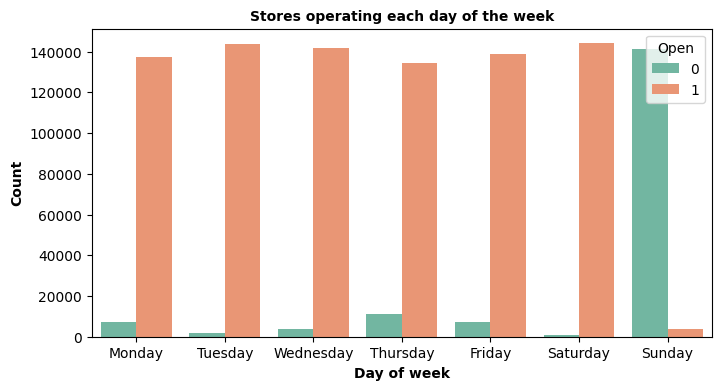

In [36]:
# Visualizing the number of stores operating each weekdays
plt.figure(figsize=(8,4))
ax=sns.countplot(x='DayOfWeek',hue='Open',data=df, palette = 'Set2')
ax.set_xlabel('Day of week',size=10,fontdict={"weight": "bold"})
ax.set_ylabel('Count',size=10,fontdict={"weight": "bold"})
ax.set_title("Stores operating each day of the week",fontsize=10,fontdict={"weight": "bold"})
plt.xticks(range(0,7),labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.show()

##### 1. Why did you pick the specific chart?

The above countplot can differentiate between whether the store was open or not on a day with the count of the stores as well.

##### 2. What is/are the insight(s) found from the chart?

We can see the count of stores that were open or closed on particular day.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It will help us to know on which day most of the stores are closed or open.

#### Chart - 4 Yearwise Sales

In [37]:
# Checking the sum of sales of each unique year
YearwiseSales=df.groupby(['Year'],as_index=False).agg({'Sales':"sum"})
print(YearwiseSales)

   Year       Sales
0  2013  2302876084
1  2014  2180804896
2  2015  1389499643


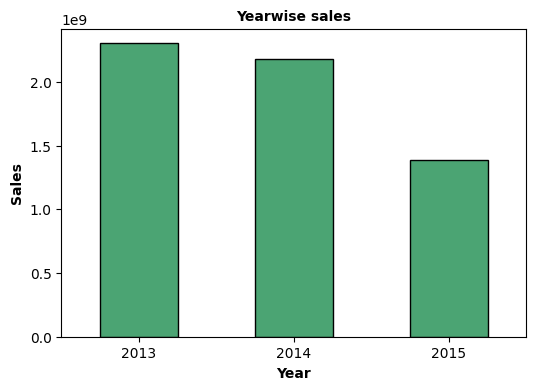

In [38]:
# Plotting it using bar graph
plt.figure(figsize=(6,4))
ax=sns.barplot(x = 'Year', y = 'Sales',data=YearwiseSales,color='mediumseagreen', width = 0.5,edgecolor = 'black' )
ax.set_xlabel('Year',size=10,fontdict={"weight": "bold"})
ax.set_ylabel('Sales',size=10,fontdict={"weight": "bold"})
ax.set_title('Yearwise sales',fontsize=10,fontdict={"weight": "bold"})
plt.show()

##### 1. Why did you pick the specific chart?

Bar graph makes it easier to get the count of different variables in one chart.

##### 2. What is/are the insight(s) found from the chart?

Sales in 2015 was the most followed by 2014 and then 2013 which has the lowest sale.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can find out which year had the most sales and this would help narrow down the things that helped during the same year in the increasing sales.

#### Chart - 5 Effect of promo on sales and customers

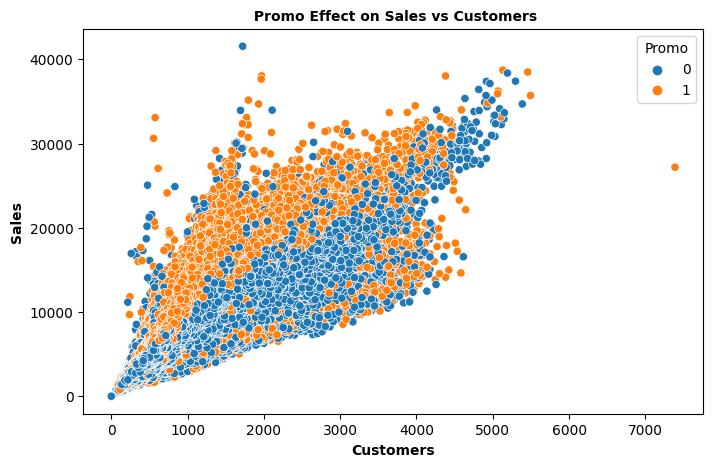

In [39]:
# Plotting the scatter plot
plt.figure(figsize=(8,5))
ax = sns.scatterplot(data=df,x='Customers',y='Sales',hue='Promo',cmap=plt.cm.get_cmap('YlGn'))
ax.set_xlabel('Customers',size=10,fontdict={"weight": "bold"})
ax.set_ylabel('Sales',size=10,fontdict={"weight": "bold"})
ax.set_title(" Promo Effect on Sales vs Customers",fontsize=10,fontdict={"weight": "bold"})
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot identifies a possible relationship between changes observed in two different sets of variables.

##### 2. What is/are the insight(s) found from the chart?

We can see the how much sales increased when a promo was used. where yellow dots show instances of promo used

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes introducing a promo resulted an increase in the sales.


#### Chart - 6 Effect of promo2 on sales and customers

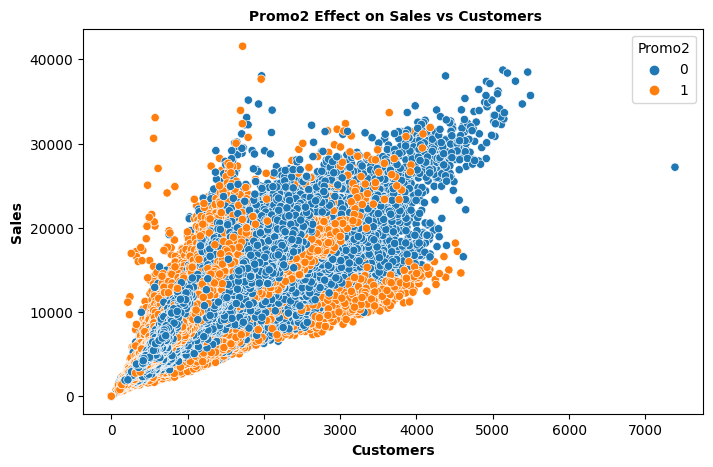

In [40]:
# Plotting the scatter plot
plt.figure(figsize=(8,5))
ax = sns.scatterplot(data=df,x='Customers',y='Sales',hue='Promo2',cmap=plt.cm.get_cmap('YlGn'))
ax.set_xlabel('Customers',size=10,fontdict={"weight": "bold"})
ax.set_ylabel('Sales',size=10,fontdict={"weight": "bold"})
ax.set_title(" Promo2 Effect on Sales vs Customers",fontsize=10,fontdict={"weight": "bold"})
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot identifies a possible relationship between changes observed in two different sets of variables.

##### 2. What is/are the insight(s) found from the chart?

Promo2 had lesser effect on sales as compared to the promo which resulted in good increase in sales

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Company needs to improve its promo strategy as promo2 did not increase sales remarkably.

#### Chart - 7 Average Sales of each month

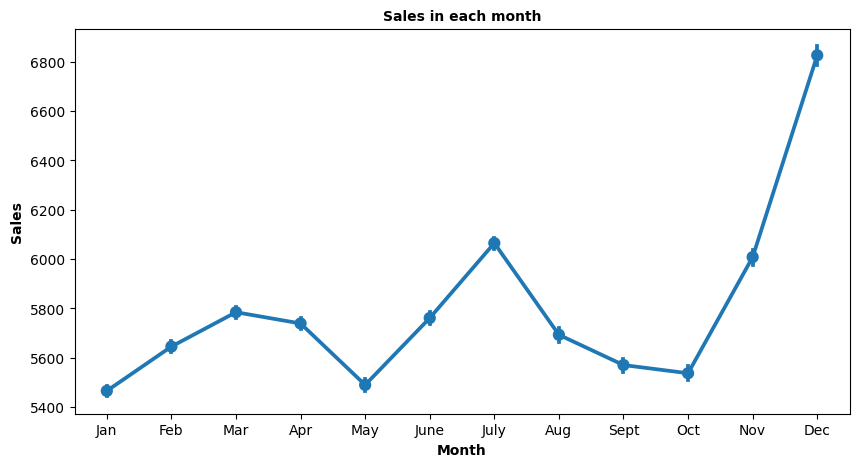

In [41]:
# Plotting using lineplot
plt.figure(figsize=(10,5))
ax = sns.pointplot(x='Month', y='Sales', data = df)
ax.set_xlabel('Month',size=10,fontdict={"weight": "bold"})
ax.set_ylabel('Sales',size=10,fontdict={"weight": "bold"})
ax.set_title("Sales in each month",fontsize=10,fontdict={"weight": "bold"})
plt.xticks(range(0,12),labels=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'])
plt.show()

##### 1. Why did you pick the specific chart?

Line plot is used to show change in variable with respect to a fixed time.

##### 2. What is/are the insight(s) found from the chart?

In the chart we can see that sales increases till march and it is the lowest in may and then increases till july and again decreases till october and then there is a steep increase in the sales during the month of november and december.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It will help in setting the sales strategy for each month and help gain insights to the reasons in the sudden changes in sales pattern that occur during the year.

#### Chart - 8 Sale vs store type

Text(0.5, 1.0, 'Boxplot For Sales Values with respect to Store Type')

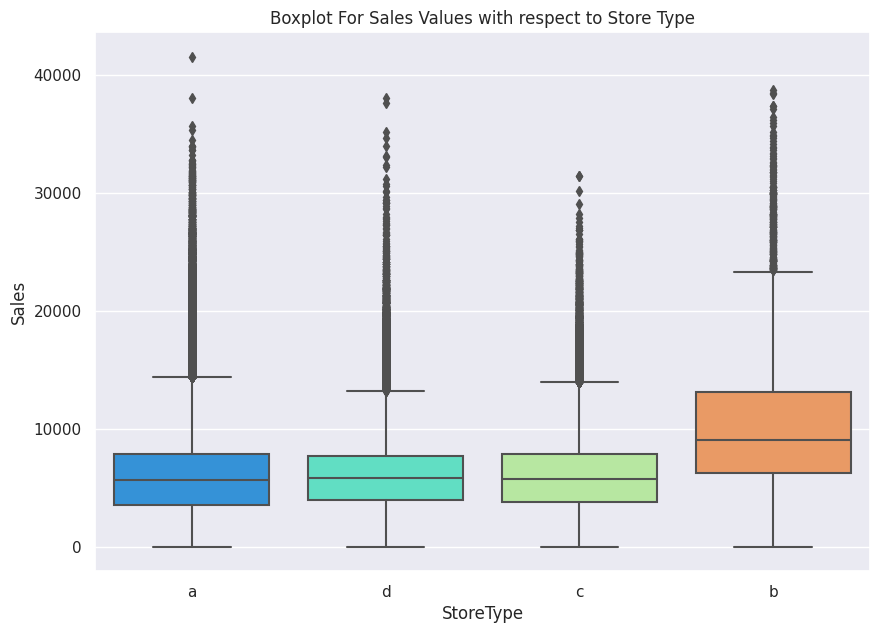

In [42]:
sns.set(rc={'figure.figsize':(10,7)})
sns.boxplot(x="StoreType", y="Sales", data=df,palette='rainbow')
plt.title('Boxplot For Sales Values with respect to Store Type')
     

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8 Effect of School Holidays on Sales

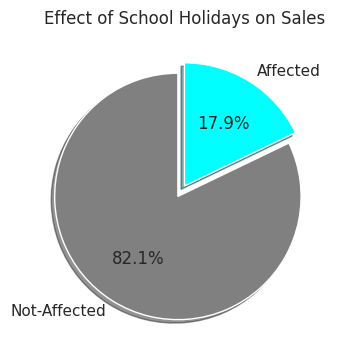

In [43]:
# Plotting the relationship between school holiday and sales using a pie plot
plt.figure(figsize=(6,4))
labels = 'Not-Affected' , 'Affected'
data = df.SchoolHoliday.value_counts()
plt.pie(data, explode=(0.1,0.0), labels=labels, colors = ['grey', 'cyan'], autopct='%1.1f%%', shadow=True,startangle = 90)
plt.title("Effect of School Holidays on Sales")
plt.show()

##### 1. Why did you pick the specific chart?

Pie chart can show comparison between two variables accurately.

##### 2. What is/are the insight(s) found from the chart?

Sales increased only in 17.9% of the school holidays.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It will help in assesing that during school holidays there is not a very steep increase in the sales.

#### Chart-9 Effect of State Holiday on Sales

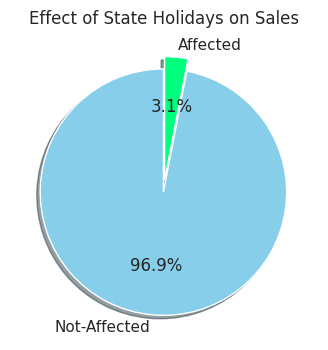

In [44]:
# Plotting the relationship between state holiday and sales using a pie plot
plt.figure(figsize=(6,4))
labels = 'Not-Affected' , 'Affected'
data = df.StateHoliday.value_counts()
plt.pie(data, explode=(0.05,0.05), labels=labels, colors = ['skyblue', 'springgreen'], autopct='%1.1f%%', shadow=True,startangle = 90)
plt.title("Effect of State Holidays on Sales")
plt.show()

1. Why did you pick the specific chart?

Pie chart can show comparison between two variables accurately.

2. What is/are the insight(s) found from the chart?

Only a small fraction of the total sales gets affected during state holidays, i.e. state holidays do not increase sales.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business can focus on other strategies to promote the sales as state holidays do not affect the sales.

#### Chart - 10 Relationship between store type, Assortment and sales

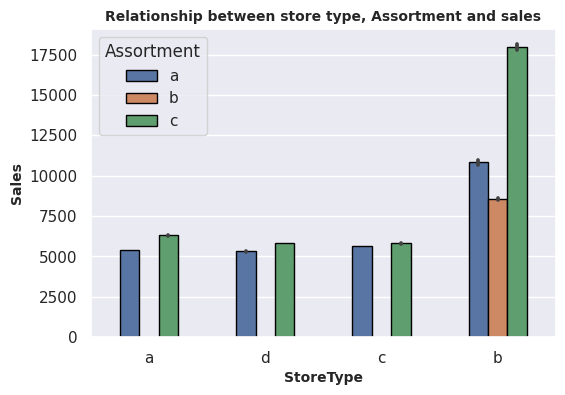

In [45]:
# plotting using multivariable bar graph
plt.figure(figsize=(6,4))
ax = sns.barplot(x= df["StoreType"],y= df['Sales'],hue= df["Assortment"], width = 0.5,edgecolor = 'black')
ax.set_xlabel('StoreType',size=10,fontdict={"weight": "bold"})
ax.set_ylabel('Sales',size=10,fontdict={"weight": "bold"})
ax.set_title("Relationship between store type, Assortment and sales",fontsize=10,fontdict={"weight": "bold"})
plt.show()

##### 1. Why did you pick the specific chart?

In this bar graph we can see all the variables and relationship between them in a structured manner.

##### 2. What is/are the insight(s) found from the chart?

We can see in the chart that store types a,d,c don't have assortment type b and the only store with it has highest sale in all levels. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes it will help in making informed business decision.

####Chart-11 Sales by each kind of store

In [46]:
# Getting the values of sales by each kind of store
store = df.groupby("StoreType")["Sales"].sum()
print(store)

StoreType
a    3165334859
b     159231395
c     783221426
d    1765392943
Name: Sales, dtype: int64


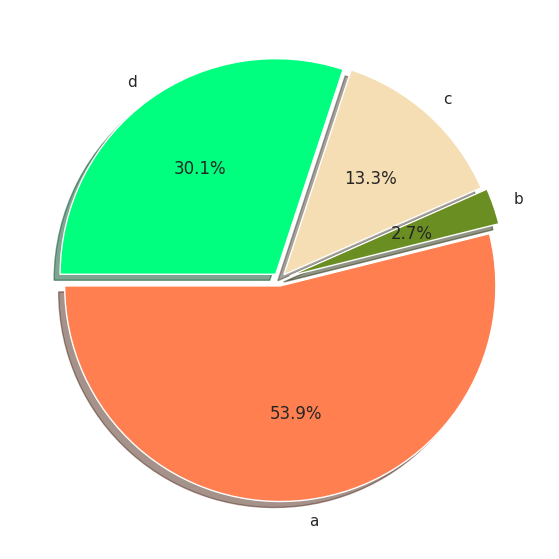

In [47]:
# Plotting using pie chart
plt.pie(x= store,explode = (0.03,0.05,0.03,0.03),labels = ['a','b','c','d'],shadow = True ,autopct='%1.1f%%',startangle = 180,
        colors = ['Coral','olivedrab','wheat','springgreen'])
plt.show()


##### 1. Why did you pick the specific chart?

Pie chart makes it easy to display percentage contribution of multiple variables.

##### 2. What is/are the insight(s) found from the chart?

We can see that more than half of the total sales is contributed by store type and the order of sales by each of the store is as follows:

a>d>c>b

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight will help the store to change their sales strategy to improve on the sales.

#### Chart-12 Checking the sales in each day of the week

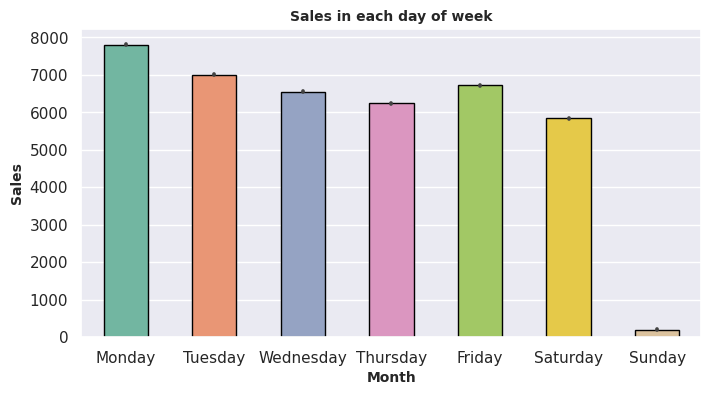

In [48]:
# Plotting using lineplot
plt.figure(figsize=(8,4))
ax = sns.barplot(x='DayOfWeek', y='Sales', data = df,edgecolor = 'black', width = 0.5, palette = 'Set2')
ax.set_xlabel('Month',size=10,fontdict={"weight": "bold"})
ax.set_ylabel('Sales',size=10,fontdict={"weight": "bold"})
ax.set_title("Sales in each day of week",fontsize=10,fontdict={"weight": "bold"})
plt.xticks(range(0,7),labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.show()

1. Why did you pick the specific chart?

A count plot shows the count of multiple sets of data in very structured way.

2. What is/are the insight(s) found from the chart?

Sales decrease continuously from Monday to Thursday then there is a slight increase on Friday and again sales decrease on saturday and on sunday there is very low sales.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It will help the business find out reasons to why sales is lowst on sunday and why it decreases as compared to other days.

####Chart-13 Checking number sales and promo relation on each week day

Text(0.5, 1.0, 'Sales and Promo During The week ')

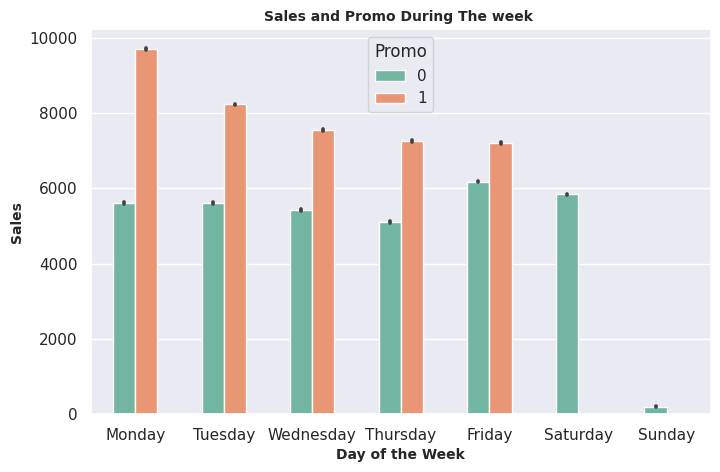

In [49]:
# plotting the sales and promo relation during a week
plt.figure(figsize=(8,5))
ax = sns.barplot(x=df["DayOfWeek"],y=df['Sales'],hue=df["Promo"],width = 0.5, palette = 'Set2')
ax.set_xlabel('Day of the Week',size=10,fontdict={"weight": "bold"})
plt.xticks(range(0,7),labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax.set_ylabel('Sales',size=10,fontdict={"weight": "bold"})
ax.set_title("Sales and Promo During The week ",fontsize=10,fontdict={"weight" : 'bold'})

1. Why did you pick the specific chart?

A count plot shows the count of multiple sets of data in very structured way.

2. What is/are the insight(s) found from the chart?

During weekdays promos improve the sales and during the weekends saturday doesn't have any promo still sales is good and sunday doesn't have any promo.

3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Sales on saturday are still good without any promo, this would help business understand the reasons for it.

#### Chart - 14 - Correlation Heatmap

In [ ]:
# plotting the heatmap
plt.figure(figsize=(25,13))
plot=sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

##### 1. Why did you pick the specific chart?

We wanted to check insights of correlation among every two features in the dataset so we choosen this chart(Heatmap).

##### 2. What is/are the insight(s) found from the chart?

We can infer that some features like Cutomers, promo and SchoolHoliday are positively correlated with Sales. While others like DayofWeek, CompetitionDistance and promo2 are negatively correlated with Sales.Even we can state the correlation within any two independent features with the help of this chart(heatmap)


3. Will the gained insights help creating a positive business impact?

  Are there any insights that lead to negative growth? Justify with specific reason.

Yes. As we can get which features are highly impacting to dependant variable i.e sales, we can focus on it to achieve max sales.

### Chart-15 Pair plot

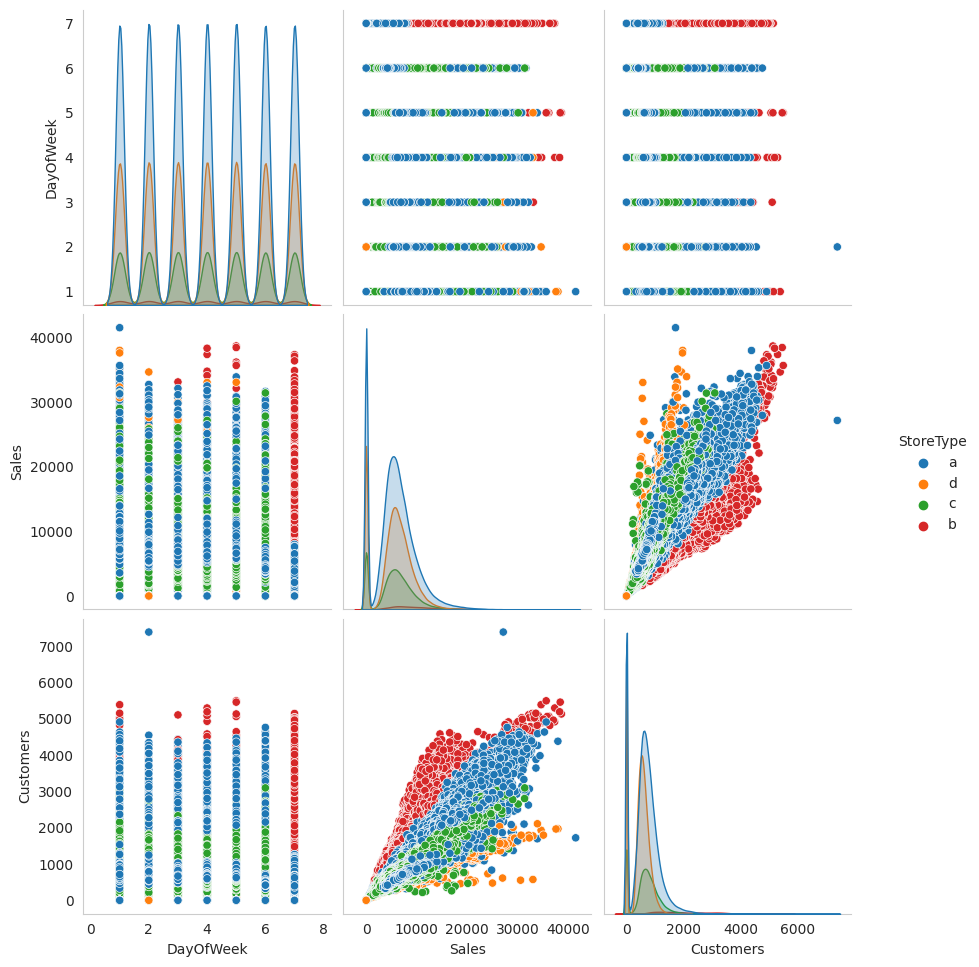

In [ ]:
# Pair Plot visualization code
sns.set_style("whitegrid", {'axes.grid' : False})
PairPlot=df[['DayOfWeek','Sales','Customers','StoreType']].copy()
pp=sns.pairplot(PairPlot,hue='StoreType')
pp.fig.set_size_inches(10,10);

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1
In this test we are going to check whether there is any relation between sales and week day on which it is occuring.

Null Hypothesis (H0) - There is no relation between DayOfWeek and Sales

Alternate Hypothesis (H1) - There is a relationship between DayOfWeek and sales

#### 2. Perform an appropriate statistical test.

In [51]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr
day = df["DayOfWeek"].head(1500)
sale = df["Sales"].head(1500)

stat, test1 = pearsonr(day, sale)
print('stat=%.3f, test1 = %.2f'%(stat, test1))
if test1> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')

stat=-0.606, test1 = 0.00
Rejected Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

We have used Pearson Correlation test to obtain P-Value along with Pearson Correlation coefficient value.It is a measure of linear correlation between two sets of data.

##### Why did you choose the specific statistical test?

We want to check the relationship between two features if they are positively or negatively correlated.

P-value and Pearson Correlation coefficient will always have a value between -1 and 1.

In our test we can see that after applying test on DayOfWeek and sales features we got Correlation coefficient as "-0.606" which implies that theses two features are having weak negative correlation between them.

### Hypothetical Statement - 2 In this hypothesis test we will check whether Customers and sales are co-related.

Null Hypothesis - There is no relation between Customers and Sales

Alternate Hypothesis - There is a relationship between Customers and sales

#### 2. Perform an appropriate statistical test.

In [52]:

# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr
customer = df["Customers"].head(1500)
sales = df["Sales"].head(1500)

stat, test2 = pearsonr(customer, sales)
print('stat=%.3f, test2 = %.2f'%(stat, test2))
if test2> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')

stat=0.955, test2 = 0.00
Rejected Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

We have used Pearson Correlation test to obtain P-Value along with Pearson Correlation coefficient value.It is a measure of linear correlation between two sets of data.

##### Why did you choose the specific statistical test?

We want to check the relationship between two features if they are positively or negatively correlated.

P-value and Pearson Correlation coefficient will always have a value between -1 and 1.Here we can see that 

After applying test on Customers and sales features we got Correlation coefficient as "0.955" which implies that theses two features are having strong positive correlation between them.

### Hypothetical Statement - 3 
In the third test we check whether there is a relation between School Holiday and sales.

Null Hypothesis - There is no relation between SchoolHoliday and Sales

Alternate Hypothesis - There is a relationship between SchoolHoliday and Sales

#### 2. Perform an appropriate statistical test.

In [53]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr
holiday = df["SchoolHoliday"].head(1500)
sales = df["Sales"].head(1500)

stat, test3 = pearsonr(holiday, sale)
print('stat=%.3f, test3 = %.2f'%(stat,test3))
if test3> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')

stat=0.128, test3 = 0.00
Rejected Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

We have used Pearson Correlation test to obtain P-Value along with Pearson Correlation coefficient value.It is a measure of linear correlation between two sets of data.

##### Why did you choose the specific statistical test?

We want to check the relationship between two features if they are positively or negatively correlated.P-value and Pearson Correlation coefficient will always have a value between -1 and 1.

Here we can see that after applying test on Customers and sales features we got Correlation coefficient as 0.128 which implies that theses two features are having weak positive correlation between them.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [54]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

Store                              0
DayOfWeek                          0
Date                               0
Sales                              0
Customers                          0
Open                               0
Promo                              0
StateHoliday                       0
SchoolHoliday                      0
StoreType                          0
Assortment                         0
CompetitionDistance                0
CompetitionOpenSinceMonth          0
CompetitionOpenSinceYear           0
Promo2                             0
Promo2SinceWeek              1016094
Promo2SinceYear              1016094
PromoInterval                1016094
Year                               0
Month                              0
WeekOfYear                         0
DayOfYear                          0
dtype: int64

In the above result we see that there are a few columns with missing values we will fill them accordingly.

In [55]:
# Filling the values
df2["Promo2SinceWeek"].fillna(0, inplace=True)
df2["Promo2SinceYear"].fillna(0, inplace=True)
df2["PromoInterval"].fillna(0, inplace=True)

In [56]:
#since the stores closed had 0 sale value; removing the irrelevant part
df_1 = df[df.Open != 0]
df_1.drop('Open', axis=1, inplace=True)

In [57]:
# StateHoliday had a few different data types we have to change it
#changing into boolean 
df_1['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

In [58]:
#setting date and store as index
df_1.set_index(['Date','Store'],inplace=True)
#sorting index following the time series
df_1.sort_index(inplace=True)     

#### What all missing value imputation techniques have you used and why did you use those techniques?

There were a few columns with missing values, we filled them with appropriate values.

### 2. Handling Outliers

In [59]:
# Handling Outliers & Outlier treatments
df_1['Sales'].skew()

1.5939220392699818

In [60]:
print("Mean value of Sales",df_1['Sales'].mean())
print("Std value of Sales",df_1['Sales'].std())
print("Min value of Sales",df_1['Sales'].min())
print("Max value of Sales",df_1['Sales'].max())

Mean value of Sales 6955.514290755952
Std value of Sales 3104.2146804283475
Min value of Sales 0
Max value of Sales 41551


In [61]:
# Finding the boundary values
print("Highest allowed",df_1['Sales'].mean() + 3*df_1['Sales'].std())
print("Lowest allowed",df_1['Sales'].mean() - 3*df_1['Sales'].std())

Highest allowed 16268.158332040995
Lowest allowed -2357.1297505290904


In [62]:

# Finding the outliers
df_1[(df_1['Sales'] > 10.03) | (df_1['Sales'] < 7.48)]

DayOfWeek  Sales  Customers  Promo  StateHoliday  \
Date       Store                                                     
2013-01-01 85             2   4220        619      0             1   
           259            2   6851       1444      0             1   
           262            2  17267       2875      0             1   
           274            2   3102        729      0             1   
           335            2   2401        482      0             1   
...                     ...    ...        ...    ...           ...   
2015-07-31 1111           5   5723        422      1             0   
           1112           5   9626        767      1             0   
           1113           5   7289        720      1             0   
           1114           5  27508       3745      1             0   
           1115           5   8680        538      1             0   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-01 85                 1         b          a               1870.0   
           259                1         b          b                210.0   
           262                1         b          a               1180.0   
           274                1         b          b               3640.0   
           335                1         b          a                 90.0   
...                         ...       ...        ...                  ...   
2015-07-31 1111               1         a          a               1900.0   
           1112               1         c          c               1880.0   
           1113               1         a          c               9260.0   
           1114               1         a          c                870.0   
           1115               1         d          c               5350.0   

                  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
Date       Store                                                                
2013-01-01 85                          10.0                    2011.0       0   
           259                          9.0                    2013.0       0   
           262                          5.0                    2013.0       0   
           274                          9.0                    2013.0       1   
           335                          9.0                    2013.0       1   
...                                     ...                       ...     ...   
2015-07-31 1111                         6.0                    2014.0       1   
           1112                         4.0                    2006.0       0   
           1113                         9.0                    2013.0       0   
           1114                         9.0                    2013.0       0   
           1115                         9.0                    2013.0       1   

                  Promo2SinceWeek  Promo2SinceYear PromoInterval  Year  Month  \
Date       Store                                                                
2013-01-01 85                 NaN              NaN           NaN  2013      1   
           259                NaN              NaN           NaN  2013      1   
           262                NaN              NaN           NaN  2013      1   
           274                NaN              NaN           NaN  2013      1   
           335                NaN              NaN           NaN  2013      1   
...                           ...              ...           ...   ...    ...   
2015-07-31 1111               NaN              NaN           NaN  2015      7   
           1112               NaN              NaN           NaN  2015      7   
           1113               NaN              NaN           NaN  2015      7   
           1114               NaN              NaN           NaN  2015      7   
           1115               NaN              NaN           NaN  2015      7  

###3. Feature Manipulation

In [63]:
# Manipulating Features to minimize feature correlation and create new features
#combining competition open since month and year into total months
df_1['CompetitionOpen'] = (df_1['Year'] - df_1['CompetitionOpenSinceYear'])*12 + (df_1['Month'] - df_1['CompetitionOpenSinceMonth'])
df_1['CompetitionOpen'] 

Date        Store
2013-01-01  85        15.0
            259       -8.0
            262       -4.0
            274       -8.0
            335       -8.0
                     ...  
2015-07-31  1111      13.0
            1112     111.0
            1113      22.0
            1114      22.0
            1115      22.0
Name: CompetitionOpen, Length: 844392, dtype: float64

In [64]:
#correcting the neg values
df_1['CompetitionOpen'] = df_1['CompetitionOpen'].apply(lambda x:0 if x < 0 else x)
df_1['CompetitionOpen']
     

Date        Store
2013-01-01  85        15.0
            259        0.0
            262        0.0
            274        0.0
            335        0.0
                     ...  
2015-07-31  1111      13.0
            1112     111.0
            1113      22.0
            1114      22.0
            1115      22.0
Name: CompetitionOpen, Length: 844392, dtype: float64

In [65]:
#dropping both the columns
df_1.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)

In [66]:
#changing promo2 features into meaningful inputs
#combining promo2 to total months
df_1['Promo2Open'] = (df_1['Year'] - df_1['Promo2SinceYear'])*12 + (df_1['WeekOfYear'] - df_1['Promo2SinceWeek'])*0.230137 + (df_1['Promo2'])
df_1['Promo2Open']
     

Date        Store
2013-01-01  85      NaN
            259     NaN
            262     NaN
            274     NaN
            335     NaN
                     ..
2015-07-31  1111    NaN
            1112    NaN
            1113    NaN
            1114    NaN
            1115    NaN
Name: Promo2Open, Length: 844392, dtype: float64

In [67]:
#correcting the neg values
df_1['Promo2Open'] = df_1['Promo2Open'].apply(lambda x:0 if x < 0 else x)*df_1['Promo2']
df_1['Promo2Open']
     

Date        Store
2013-01-01  85      NaN
            259     NaN
            262     NaN
            274     NaN
            335     NaN
                     ..
2015-07-31  1111    NaN
            1112    NaN
            1113    NaN
            1114    NaN
            1115    NaN
Name: Promo2Open, Length: 844392, dtype: float64

In [68]:
#dropping both the columns
df_1.drop(['Promo2SinceYear','Promo2SinceWeek','Promo2'], axis=1,inplace=True)

In [69]:
#Dropping unecessary columns
df_1.drop(['PromoInterval'],axis=1,inplace=True)
df_1.drop(['Promo2Open'],axis=1,inplace=True)

### 4. Categorical Encoding

In [70]:
# creating a copy of dataset
copyofdf_1 = df_1.copy()

In [71]:
#importing
from sklearn.preprocessing import OneHotEncoder

In [72]:
#categorical features
categorical_cols_to_encode = ['DayOfWeek', 'StoreType', 'Assortment']

In [73]:
# Using one hot encoding
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(copyofdf_1[categorical_cols_to_encode])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols_to_encode))
copyofdf_1[encoded_cols] = encoder.transform(copyofdf_1[categorical_cols_to_encode])

In [74]:
# Printing the encoded columns
encoded_cols

['DayOfWeek_1',
 'DayOfWeek_2',
 'DayOfWeek_3',
 'DayOfWeek_4',
 'DayOfWeek_5',
 'DayOfWeek_6',
 'DayOfWeek_7',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c']

In [75]:
# Dropping the columns
copyofdf_1.drop(['DayOfWeek','StoreType','Assortment'],axis=1,inplace=True)

In [76]:
# Checking the shape of the dataset after dropping the columns
copyofdf_1.shape

(844392, 25)

### 5. Data Transformation

Data Splitting

Splitting the dataframe into two parts, a training set and a test set. The training set consists of data from the start of the year 2013 up to 14th of June 2015, while the test set consists of data from 15th of June 2015 to the end of July 2015.

In [77]:
# Split your data to train and test. Choose Splitting ratio wisely.
#slicing the most recent six weeks and creating train and test set
#training the dataset
start_train = pd.to_datetime("2013-01-01")
end_train = pd.to_datetime("2015-06-14")
ross_df_train = copyofdf_1.loc[start_train:end_train]
#testing
start_test = pd.to_datetime("2015-06-15")
end_test = pd.to_datetime("2015-07-31")
ross_df_test = copyofdf_1.loc[start_test:end_test]

In [78]:
# X and y split for train 
X_train = ross_df_train.drop('Sales',axis=1)
y_train = ross_df_train[['Sales']]
# Printing
print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')

The shape of X_train is: (798540, 24)
The shape of y_train is: (798540, 1)


In [79]:
# X and y split for test
X_test = ross_df_test.drop('Sales',axis=1)
y_test = ross_df_test[['Sales']]

In [80]:
# Printing the shapes of both test columns
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of X_test is: (45852, 24)
The shape of y_test is: (45852, 1)


### 6. Data Scaling

In [81]:
# Scaling your data

# scaling
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train[list(X_train.columns)] = stdsc.fit_transform(X_train[list(X_train.columns)])
X_test[list(X_test.columns)] = stdsc.transform(X_test[list(X_test.columns)])

scaler = StandardScaler()
y_train[list(y_train.columns)] = scaler.fit_transform(y_train[list(y_train.columns)])
y_test[list(y_test.columns)] = scaler.transform(y_test[list(y_train.columns)])

Scaling in machine learning is used to standardize the range of independent variables or features of a dataset. This is often necessary because the scale of one feature may be vastly different from the scale of another feature. Scaling helps to ensure that no single feature has a disproportionate impact on the model during training and can improve the performance of certain algorithms

## ***7. ML Model Implementation***

In [82]:
# Getting the mean of sales
sales_mean=copyofdf_1.Sales.mean()

In [83]:
# Double checking the missing values
copyofdf_1.isna().sum()

Sales                  0
Customers              0
Promo                  0
StateHoliday           0
SchoolHoliday          0
CompetitionDistance    0
Year                   0
Month                  0
WeekOfYear             0
DayOfYear              0
CompetitionOpen        0
DayOfWeek_1            0
DayOfWeek_2            0
DayOfWeek_3            0
DayOfWeek_4            0
DayOfWeek_5            0
DayOfWeek_6            0
DayOfWeek_7            0
StoreType_a            0
StoreType_b            0
StoreType_c            0
StoreType_d            0
Assortment_a           0
Assortment_b           0
Assortment_c           0
dtype: int64

### ML Model - 1 Linear Regression

In [84]:
# ML Model - 1 Implementation
# Importing libraries
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#fitting the model
model = linear_model.LinearRegression()
model.fit(X_train,y_train)
     


LinearRegression()

In [85]:
#making predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [86]:
#Mean Squared Error or MSE
MSE_train = round(mean_squared_error(y_train,y_pred_train),26)
MSE_test = round(mean_squared_error(y_test,y_pred_test),26)   

In [87]:
print("Weights: ", model.coef_)
print("Intercept: ", model.intercept_)    

Weights:  [[ 0.93771941  0.20410278  0.00362258  0.01438034  0.05364088  0.03921808
  -0.01620644 -0.00737895  0.05901182  0.01292613  0.0489356  -0.00816453
  -0.024387   -0.03273137 -0.01473226  0.02949364  0.00646943 -0.0456277
  -0.1526229  -0.04680882  0.12851959 -0.01280327 -0.1282724   0.03809955]]
Intercept:  [2.0883787e-15]


#### Printing the various metrics of Model

In [88]:
# Printing
# Mean Absolute Error Train
MAE_train = mean_absolute_error(y_train,y_pred_train)
print("MAE Train :" ,MAE_train)

# Mean Absolute Error Test
MAE_test = mean_absolute_error(y_test,y_pred_test)
print("MAE Test:" ,MAE_test)

# Mean Squared Error Train
MSE_train  = mean_squared_error(y_train,y_pred_train)
print("MSE Train :" , MSE_train)

# Mean Squared Error Test
MSE_test  = mean_squared_error(y_test,y_pred_test)
print("MSE Test:" , MSE_test)

# Root Mean Squared Error Train
RMSE_train = np.sqrt(MSE_train)
print("RMSE Train:" ,RMSE_train)

# Root Mean Squared Error Test
RMSE_test = np.sqrt(MSE_test)
print("RMSE Test:" ,RMSE_test)

# Root Mean Squared Percentage Error Train
RMSPE_train=RMSE_train/sales_mean
print("RMSPE Train:",RMSPE_train)

# Root Mean Squared Percentage Error Test
RMSPE_test=RMSE_test/sales_mean
print("RMSPE Test:",RMSPE_test)

# R-Squared Train
R2_train= r2_score(y_train,y_pred_train)
print("R2 Train:" ,R2_train)

# R-Squared Test
R2_test= r2_score(y_test,y_pred_test)
print("R2 Test:" ,R2_test)

# Addjusted R-Squared Train
ADJUSTED_R2_train=1-((1-R2_train)*(168879-1)/(168879-1-26))
print("Adjusted R2 Train :" ,ADJUSTED_R2_train)

# Addjusted R-Squared Test
ADJUSTED_R2_test=1-((1-R2_test)*(168879-1)/(168879-1-26))
print("Adjusted R2 Test:" ,ADJUSTED_R2_test)
     

MAE Train : 0.3026517774689327
MAE Test: 0.31294012382219055
MSE Train : 0.1701392087832692
MSE Test: 0.18780493083608582
RMSE Train: 0.4124793434625172
RMSE Test: 0.43336466265269696
RMSPE Train: 5.9302493851635424e-05
RMSPE Test: 6.230519333827682e-05
R2 Train: 0.8298607912167307
R2 Test: 0.8102974532461569
Adjusted R2 Train : 0.8298345930110336
Adjusted R2 Test: 0.8102682426580939


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting.Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression

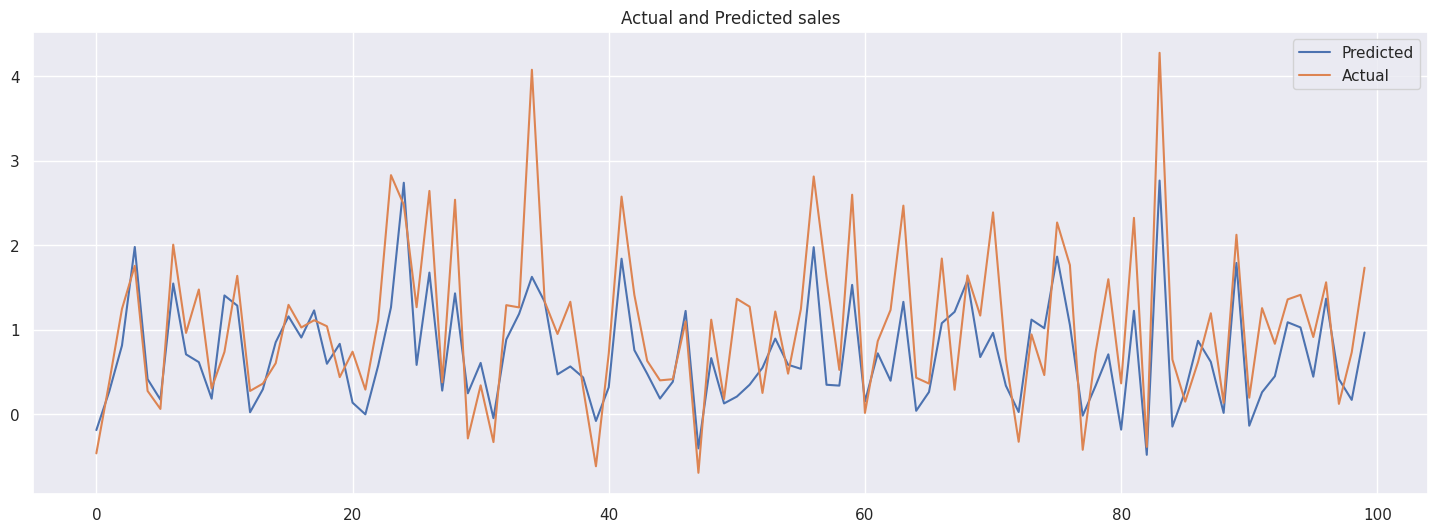

In [92]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(18,6))
plt.plot((y_pred_test)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted sales')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

GridSearchCV

Ridge Regression

In [106]:

# import ridge regression from sklearn library
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
ridge= Ridge()

# Defining parameters
parameters = {"alpha": [1e-1,1,5,7,10,11,14,15,16,17], "max_iter":[1,2,3]}

# Train the model
ridgeR = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridgeR.fit(X_train,y_train)

# Predict the output
y_train_ridge_pred = ridgeR.predict(X_train)
y_test_ridge_pred = ridgeR.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {ridgeR.best_params_}")
print(f"Negative mean square error is: {ridgeR.best_score_}")

The best alpha value found out to be: {'alpha': 17, 'max_iter': 1}
Negative mean square error is: -0.17188138531129935


Lasso Regression

In [107]:

# import lasso regression from sklearn library
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
lasso= Lasso()

# Defining parameters
parameters_lasso = {"alpha": [1e-5,1e-4,1e-3,1e-2,1e-1,1,5], "max_iter":[7,8,9,10]}

# Train the model
lassoR = GridSearchCV(lasso, parameters_lasso, scoring='neg_mean_squared_error', cv=5)
lassoR.fit(X_train,y_train)

# Predict the output
y_train_lasso_pred = lassoR.predict(X_train)
y_test_lasso_pred = lassoR.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {lassoR.best_params_}")
print(f"Negative mean square error is: {lassoR.best_score_}")

The best alpha value found out to be: {'alpha': 0.001, 'max_iter': 7}
Negative mean square error is: -0.17365834380278744


##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and their values. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Despite using Lasso, Ridge models, we couldn't see any significant improvement .

### ML Model - 2 Decision Tree

In [109]:
#Importing libraries 
from sklearn.tree import DecisionTreeRegressor
#metrics import
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [110]:
#fitting decision tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train,y_train)

#making predictions
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

Printing the various metrics of the model

In [112]:
# Printing
# Mean Absolute Error Train
MAE_train = mean_absolute_error(y_train,y_pred_train)
print("MAE Train :" ,MAE_train)

# Mean Absolute Error Test
MAE_test = mean_absolute_error(y_test,y_pred_test)
print("MAE Test:" ,MAE_test)

# Mean Squared Error Train
MSE_train  = mean_squared_error(y_train,y_pred_train)
print("MSE Train :" , MSE_train)

# Mean Squared Error Test
MSE_test  = mean_squared_error(y_test,y_pred_test)
print("MSE Test:" , MSE_test)

# Root Mean Squared Error Train
RMSE_train = np.sqrt(MSE_train)
print("RMSE Train:" ,RMSE_train)

# Root Mean Squared Error Test
RMSE_test = np.sqrt(MSE_test)
print("RMSE Test:" ,RMSE_test)

# Root Mean Squared Percentage Error Train
RMSPE_train=RMSE_train/sales_mean
print("RMSPE Train:",RMSPE_train)

# Root Mean Squared Percentage Error Test
RMSPE_test=RMSE_test/sales_mean
print("RMSPE Test:",RMSPE_test)

# R-Squared Train
R2_train= r2_score(y_train,y_pred_train)
print("R2 Train:" ,R2_train)

# R-Squared Test
R2_test= r2_score(y_test,y_pred_test)
print("R2 Test:" ,R2_test)

# Addjusted R-Squared Train
ADJUSTED_R2_train=1-((1-R2_train)*(168879-1)/(168879-1-26))
print("Adjusted R2 Train :" ,ADJUSTED_R2_train)

# Addjusted R-Squared Test
ADJUSTED_R2_test=1-((1-R2_test)*(168879-1)/(168879-1-26))
print("Adjusted R2 Test:" ,ADJUSTED_R2_test)
     

MAE Train : 1.0713733224060226e-05
MAE Test: 0.1909285348376428
MSE Train : 1.950633087008471e-06
MSE Test: 0.084184727255032
RMSE Train: 0.0013966506674929387
RMSE Test: 0.2901460446999614
RMSPE Train: 2.0079761310376738e-07
RMSPE Test: 4.171453505394599e-05
R2 Train: 0.9999980493669129
R2 Test: 0.9149646546181701
Adjusted R2 Train : 0.9999980490665525
Adjusted R2 Test: 0.9149515607905582


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


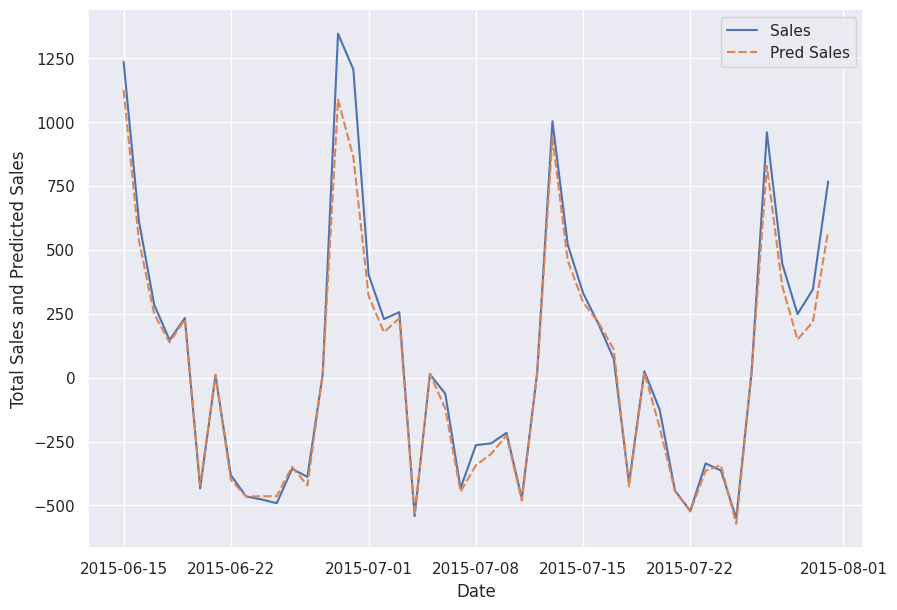

In [115]:
# Plot the test results
a = y_test.copy()
a['Pred Sales'] = y_pred_test.tolist()
df_plot = a.reset_index(level=['Date'])
plot = df_plot.groupby('Date')['Sales','Pred Sales'].sum()
sns.lineplot(data = plot)
plt.ylabel("Total Sales and Predicted Sales")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [116]:
# import ridge regression from sklearn library
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
decision_tree= DecisionTreeRegressor()
# decision_tree.fit(x_train,y_train)

# Defining parameters
parameters= {'max_depth': [16,17,18], 'min_samples_leaf': [6,7,8], 'min_samples_split': [1,2,4]}

# Train the model
decision_treeR = GridSearchCV(decision_tree, parameters, scoring='neg_mean_squared_error', cv=3)
decision_treeR.fit(X_train,y_train)

# Predict the output
y_train_grid_Dtree_pred = decision_treeR.predict(X_train)
y_test_grid_Dtree_pred = decision_treeR.predict(X_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {decision_treeR.best_params_}")
print(f"Negative mean square error is: {decision_treeR.best_score_}")

The best alpha value found out to be: {'max_depth': 18, 'min_samples_leaf': 8, 'min_samples_split': 2}
Negative mean square error is: -0.08565125090928392


##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and provides the more accurate results. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


We have used different combinations of parameters to get the best value of r2 score and least MAPE for our case. The best combination was found out to be {'max_depth': 18, 'min_samples_leaf': 8, 'min_samples_split': 2} which resulted into the improvement in the MSE

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 Random Forest Regressor

In [127]:
# import the regressor
from sklearn.ensemble import RandomForestRegressor 
  
# createing the instance
RF_TreeR = RandomForestRegressor(n_estimators=100, max_depth=18) 
  
# fiting the algorithm
RF_TreeR.fit(X_train, y_train)

# predict the model
y_train_RFtree_pred= RF_TreeR.predict(X_train)
y_test_RFtree_pred= RF_TreeR.predict(X_test)

Printing the various metrics of the model

In [129]:
# Printing
# Mean Absolute Error Train
MAE_train = mean_absolute_error(y_train,y_train_RFtree_pred)
print("MAE Train :" ,MAE_train)

# Mean Absolute Error Test
MAE_test = mean_absolute_error(y_test,y_test_RFtree_pred)
print("MAE Test:" ,MAE_test)

# Mean Squared Error Train
MSE_train  = mean_squared_error(y_train,y_pred_train)
print("MSE Train :" , MSE_train)

# Mean Squared Error Test
MSE_test  = mean_squared_error(y_test,y_test_RFtree_pred)
print("MSE Test:" , MSE_test)

# Root Mean Squared Error Train
RMSE_train = np.sqrt(MSE_train)
print("RMSE Train:" ,RMSE_train)

# Root Mean Squared Error Test
RMSE_test = np.sqrt(MSE_test)
print("RMSE Test:" ,RMSE_test)

# Root Mean Squared Percentage Error Train
RMSPE_train=RMSE_train/sales_mean
print("RMSPE Train:",RMSPE_train)

# Root Mean Squared Percentage Error Test
RMSPE_test=RMSE_test/sales_mean
print("RMSPE Test:",RMSPE_test)

# R-Squared Train
R2_train= r2_score(y_train,y_train_RFtree_pred)
print("R2 Train:" ,R2_train)

# R-Squared Test
R2_test= r2_score(y_test,y_test_RFtree_pred)
print("R2 Test:" ,R2_test)

# Addjusted R-Squared Train
ADJUSTED_R2_train=1-((1-R2_train)*(168879-1)/(168879-1-26))
print("Adjusted R2 Train :" ,ADJUSTED_R2_train)

# Addjusted R-Squared Test
ADJUSTED_R2_test=1-((1-R2_test)*(168879-1)/(168879-1-26))
print("Adjusted R2 Test:" ,ADJUSTED_R2_test)
     
     

MAE Train : 0.11120240923815355
MAE Test: 0.1680613649769796
MSE Train : 1.950633087008471e-06
MSE Test: 0.0620868432916567
RMSE Train: 0.0013966506674929387
RMSE Test: 0.24917231646323934
RMSPE Train: 2.0079761310376738e-07
RMSPE Test: 3.58237085062704e-05
R2 Train: 0.9746595589407036
R2 Test: 0.9372858197071845
Adjusted R2 Train : 0.9746556569942206
Adjusted R2 Test: 0.937276162914919


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

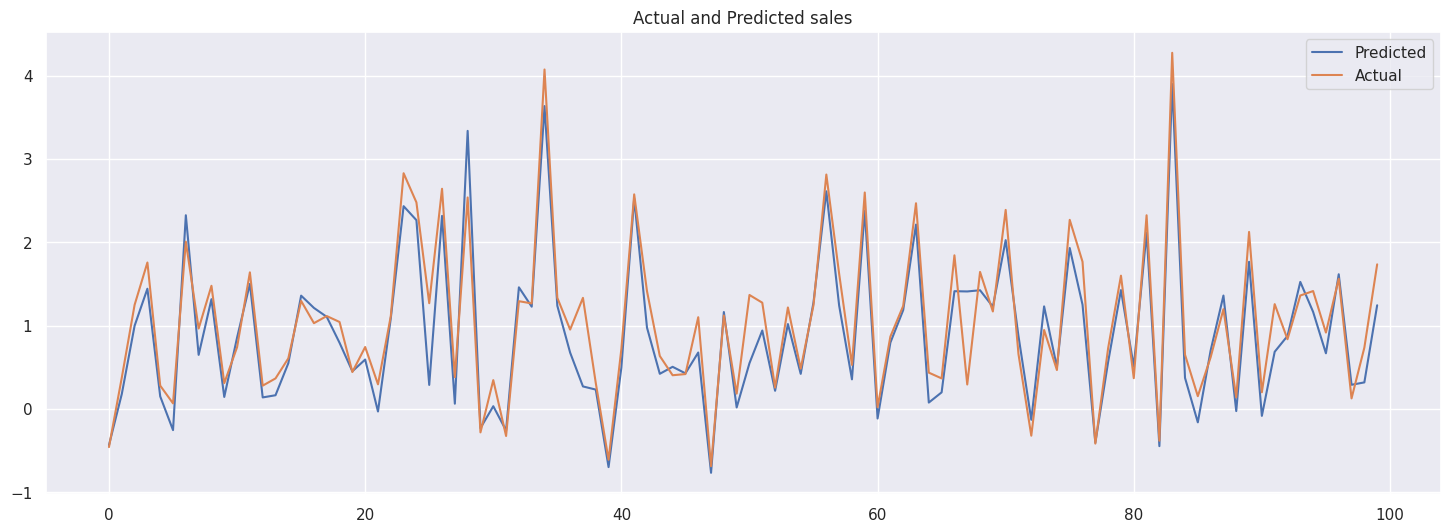

In [121]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(18,6))
plt.plot((y_pred_test)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted sales')
plt.show()

###***Best model selection***

In [130]:

# Storing different regression metrics in order to make dataframe and compare them
Regressor = ["Linear_regression","Decision_tree","Random_forest"]
MAE = [0.31,1.07,0.16] 
MSE = [0.18,0.08,0.06]
RMSE = [0.43,0.29,0.24]
RMSPE = [6.23,4.17,3.58]
r2 = [0.81,0.99,0.93]
Ar2 = [0.81,0.91,0.93]


# Create dataframe from the lists
data = {'Models': Regressor, 
        'MAE': MAE,
        'MSE': MSE,
        'RMSE': RMSE,
        'RMSPE': RMSPE,
        'R2': r2,
        'Adjusted r2': Ar2
       }
metric_df = pd.DataFrame(data)

# Printing dataframe
metric_df

,Models,MAE,MSE,RMSE,RMSPE,R2,Adjusted r2
0,Linear_regression,0.31,0.18,0.43,6.23,0.81,0.81
1,Decision_tree,1.07,0.08,0.29,4.17,0.99,0.91
2,Random_forest,0.16,0.06,0.24,3.58,0.93,0.93


From above table we can see that Random Forest Regression has performed better with lower error values and highest r2 values.

with this we can say that the best model among the three is RandomForest.

Best model- Random Forest

# **Conclusion**

We have followed following steps in this project.
1. Cleaning and preprocessing the dataset by handling null or missing values, correcting the format and datatypes.
2. Then we merged both the datasets for better analysis.
3. Performed EDA on the dataset.
4. Evaluated the results with the help of visualizations.
5. Data manipulation and Hypothesis testing for validation of the dataset.
6. Feature engineering and categorical encoding.
7. Again performed certain data transformation before using machine learning models.
8. Used Linear Regression model with Lasso and Ridge and performed cross validation and hyper parameter tuning using gridsearchcv.
9. For the second model we used Decision Tree Regressor and again used gridsearchcv for cross validation and hyperparameter tuning.
10. The third model we used is Random Forest Regressor and did its training and predicted the outcomes and all the performance metrics.
11. in all the three models we also did evaluation metric check as well as used visualizations to check the accuracy of the result and performance.
12. Finally after comparing all the results we arrived at the conclusion that with our dataset "**Random Forest Regression model**" is the best performing model.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***